In [1]:
import warnings; warnings.simplefilter('ignore')

#  Zmienic fory  --> List comp
#  Korelacje inne niz liniowa  https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/
#  Usunac zip'a przy tworzeniu df'a

### Import libs

In [164]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.options.display.float_format = '{:.0f}'.format

### Load data

In [5]:
#Read raw scrapped data
data_raw = pd.read_csv(r"C:\Users\lancernik\Desktop\Programowane\Projekty\CarScrapper\Datasets\Otomoto\120ksamochody.csv")
print(data_raw.head())

   IndexWew   Age EngineCapacity FuelType       Marka  Milage  Model  Price
0       0.0     0            NaN      NaN         NaN       0    NaN      0
1       1.0     0            0.0      0.0       Marka       0  Model      0
2       2.0  2006         1598.0      1.0  alfa-romeo  135000    147  10500
3       3.0  2006         1600.0      1.0  alfa-romeo  186000    147   8900
4       4.0  2002         1910.0      2.0  alfa-romeo  224871    147   4000


### Delete invalid data created by scrapper

In [6]:
#Delete all string values
data = data_raw[data_raw.Age.str.isnumeric()]
#Delete 0 value 
data = data[data.Age != "0"]

print(data.head())

   IndexWew   Age EngineCapacity FuelType       Marka  Milage Model  Price
2       2.0  2006         1598.0      1.0  alfa-romeo  135000   147  10500
3       3.0  2006         1600.0      1.0  alfa-romeo  186000   147   8900
4       4.0  2002         1910.0      2.0  alfa-romeo  224871   147   4000
5       5.0  2006         1598.0      1.0  alfa-romeo  154671   147  11200
6       6.0  2003         1970.0      1.0  alfa-romeo  241450   147   2700


### Some usefull functions

In [28]:
def DropNames(DataFrame):
    ''' Drop non-numeric data
    
    DataFrame = Dataframe to drop names
    '''
    #Drop non-numeric data and convert strings numbers to float numbers
    DataFrame.drop(columns=['Model','Marka','IndexWew'],inplace=True)
    DataFrame = DataFrame.astype(float)
    return DataFrame
def DropOutlier(dataset_out,mileage=4,age=4,price=4):
    ''' Drop outlier values
    
    dataset_out = dataset to drop values
    '''
    clear = dataset_out.Milage[((dataset_out.Milage - dataset_out.Milage.mean()) / dataset_out.Milage.std()).abs() > mileage]
    #Search for outlier indexes
    clear = dataset_out.Milage[((dataset_out.Milage - dataset_out.Milage.mean()) / dataset_out.Milage.std()).abs() > mileage]
    clear = clear.append(dataset_out.Age[((dataset_out.Age - dataset_out.Age.mean()) / dataset_out.Age.std()).abs() > age])
    clear = clear.append(dataset_out.Price[((dataset_out.Price - dataset_out.Price.mean()) / dataset_out.Price.std()).abs() > price])
    test1 = clear.index.get_values()
    #Delete duplicated indexes
    test = []
    for i in test1:
       if i not in test:
          test.append(i)

    #Delete row with given indexes
    for i in range(0,len(test)):
        dataset_out = dataset_out.drop(test[i],axis=0)
        
    return dataset_out

### Create correlation table for one model

In [29]:
def Correlation(ModelDF,scatter = False, printing = False):
    ''' Create corr table
    Scatter - print scatter_matrix or not
    printing - print corr table or not
    
    '''
    ModelDF = DropNames(ModelDF)
    ModelDF = DropOutlier(ModelDF)
    
    CorrMatrix = ModelDF.corr(method='pearson')
    
    #Print correlations
    if printing == True:
        print("\n\nPearson corr")
        print(CorrMatrix)

    #Print scatter matrix of corr
    if scatter == True:
        scatter_matrix(ModelDF,alpha=0.2, figsize=(6, 6), diagonal='kde')
    
    return CorrMatrix

### Create corr table for volksvagen golf

,Age,EngineCapacity,FuelType,Milage,Price
Age,1.000000,-0.218655,0.047843,-0.637252,0.804291
EngineCapacity,-0.218655,1.000000,0.508110,0.294442,-0.118309
FuelType,0.047843,0.508110,1.000000,0.228087,-0.141689
Milage,-0.637252,0.294442,0.228087,1.000000,-0.674848
Price,0.804291,-0.118309,-0.141689,-0.674848,1.000000


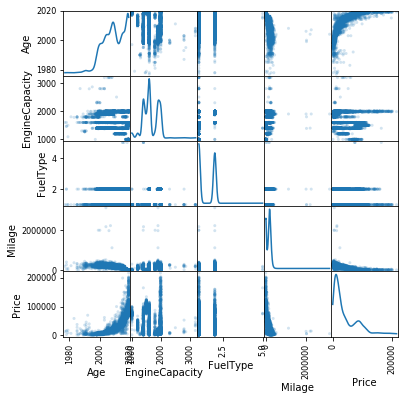

In [27]:
golf = data[data.Model == "golf"]
Correlation(golf,True,False)

### Create corr list for all models

In [30]:
def CorrModelsList(Compare1='FuelType',Compare2='Milage',MinCount=0):
    ''' Create corr list bettwen 2 values 
    
    Compare1 = Values list 1
    Compare2 = Values list 2
    MinCount = Min. count of car auctions that will be in checked for corr
    '''
    CarModels = data.Model.unique()
    
    #Create list with specific model count 
    ModelCount = []
    for model in CarModels:
        count = data['Model'].tolist().count(model)
        ModelCount.append(count)
    
    #Create list with Corr value
    CorrList = []
    for model in CarModels:
        matrix = Correlation(data[data.Model == "{}".format(model)])
        CorrList.append(matrix.get_value(index='{}'.format(Compare1),col='{}'.format(Compare2)))
            
    CorrDataframe = pd.DataFrame(list(zip(CarModels,ModelCount, CorrList)), columns =['Model', 'ModelCount','CorrValue']) 
    
    CorrDataframe = CorrDataframe[CorrDataframe.ModelCount>MinCount]
    
    return CorrDataframe

### Cars with highest drop within age

In [72]:
PriceAge = CorrModelsList('Price','Age',500)
print(PriceAge.sort_values(by=['CorrValue'],ascending=False))

                Model  ModelCount  CorrValue
24                 q7         791   0.897969
161             corsa        2920   0.892987
167            meriva        1717   0.890535
204            touran        1628   0.885802
203           touareg         602   0.884558
202            tiguan        1455   0.881234
159             astra        6884   0.881062
54                 x1         664   0.880206
115             panda         633   0.878592
126             c-max        1283   0.873813
179             caddy        1008   0.872698
83                 c3        1272   0.870019
23                 q5        1163   0.868345
16                 a5        1020   0.864991
56                 x3        1324   0.864419
174            zafira        2035   0.864255
46            seria-1        1772   0.859012
90                 c5        1410   0.856506
86   c4-grand-picasso         876   0.855341
189             jetta         547   0.851034
198            sharan         716   0.846805
134       

### Cars list with highest price drop within given mileage

In [73]:
PriceMilage = CorrModelsList('Price','Milage',500)
print(PriceMilage.sort_values(by=['CorrValue'],ascending=True))

                Model  ModelCount  CorrValue
24                 q7         791  -0.849839
179             caddy        1008  -0.847796
204            touran        1628  -0.844785
23                 q5        1163  -0.836115
203           touareg         602  -0.835122
205       transporter         557  -0.830356
56                 x3        1324  -0.818873
202            tiguan        1455  -0.817698
188              golf        6298  -0.816846
159             astra        6884  -0.814936
20                 a8         802  -0.810303
83                 c3        1272  -0.810032
134             focus        4799  -0.809797
194            passat        5414  -0.805816
54                 x1         664  -0.804141
76           berlingo         793  -0.804003
59                 x5        1156  -0.797224
198            sharan         716  -0.795931
18                 a6        4144  -0.789546
52            seria-7         904  -0.785246
50            seria-5        4402  -0.784706
161       

### Create trend line

In [110]:
def TrendLine(x,y,xlbl="xlbl",ylbl="ylbl",tile="car",plot=True):
    model = LinearRegression()
    model.fit(x,y)
    model.predict([[100]])
    
    model = linear_model.LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    if plot == True:
        plt.rcParams['figure.figsize'] = [15, 10]
        plt.scatter(x,y,s=2)
        plt.plot(x,y_pred,'r')
        plt.legend(['TrendLine', 'CarAuction'])
        plt.xlabel('{}'.format(xlbl))
        plt.ylabel('{}'.format(ylbl))
        plt.title('{}'.format(tile))
        plt.show()
    
    return model.coef_

### Create list with Coeff regression values to chceck Milage-Age dependecies

In [111]:
def CoeffModelList(CarModels,MinCount=0):
        

    CoeffList = []
    for model in CarModels:
        model = data[data.Model == "{}".format(model)]
        model = DropNames(model)
        model = DropOutlier(model, mileage=2)   
        y = pd.DataFrame(model['Age'].values.reshape(-1,1),dtype=np.int64)
        x = pd.DataFrame(model['Milage'].values.reshape(-1,1),dtype=np.int64) 

        coeff = TrendLine(x,y,plot=False)
        CoeffList.append(coeff[0,0])

    ModelCount = []
    for model in CarModels:
        count = data['Model'].tolist().count(model)
        ModelCount.append(count)

    CoeffAgeMilage = pd.DataFrame(list(zip(CarModels,ModelCount, CoeffList)), columns =['Model', 'ModelCount','CoeffValue'])
    CoeffAgeMilage = CoeffAgeMilage[CoeffAgeMilage.ModelCount>MinCount]
    return CoeffAgeMilage.sort_values(by=['CoeffValue'])


In [112]:
CarModels = data.Model.unique()
print(CoeffModelList(CarModels,500))

                Model  ModelCount  CoeffValue
103               500         619   -0.000066
83                 c3        1272   -0.000062
161             corsa        2920   -0.000060
188              golf        6298   -0.000056
52            seria-7         904   -0.000052
196              polo        2210   -0.000052
132            fiesta        2225   -0.000052
159             astra        6884   -0.000050
13                 a3        3055   -0.000050
124              tipo         604   -0.000047
134             focus        4799   -0.000047
194            passat        5414   -0.000047
115             panda         633   -0.000046
56                 x3        1324   -0.000045
18                 a6        4144   -0.000045
59                 x5        1156   -0.000045
50            seria-5        4402   -0.000045
202            tiguan        1455   -0.000044
203           touareg         602   -0.000043
46            seria-1        1772   -0.000043
204            touran        1628 

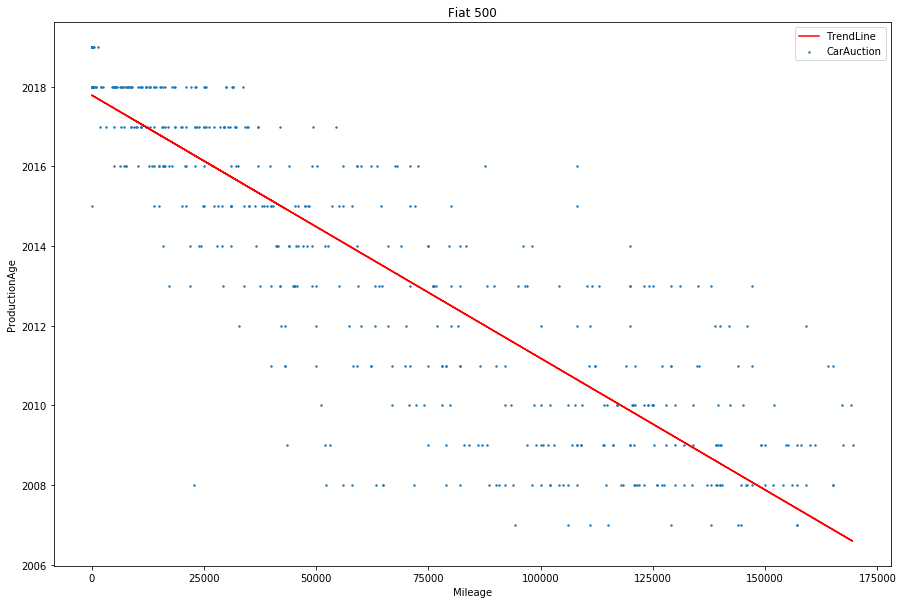

array([[-6.60964823e-05]])

In [119]:
car = data[data.Model == "500"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Fiat 500")

### Let's check Milage mean per year for some cars

In [169]:
def MeanMileageList(car):
    AgeList = car.Age.unique()

    MeanMileage = []
    CountList = []
    YearMeanList = []
    for age in AgeList:
        
        count = car[car.Age == age].shape[0]
        CountList.append(count)
        
        mean = car[car.Age == age].Milage.mean()
        MeanMileage.append(mean)

        YearMean = mean/(2020-age)
        YearMeanList.append(YearMean)

    MeanMileageList =  [round(x) for x in MeanMileage] 
    YearMeanList = [round(x) for x in YearMeanList] 
    
    AgeMilageList = pd.DataFrame(list(zip(AgeList,MeanMileageList,YearMeanList,CountList)), columns =['Age', 'MileageMean','YearMean','Count']) 

    return AgeMilageList.sort_values(by=['Age'])


## Opel Vectra

In [170]:
car = data[data.Model == "vectra"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

    Age  MileageMean  YearMean  Count
14 1994       160000      6154      2
15 1995       166700      6668      1
11 1996       268452     11186     17
13 1997       243367     10581     17
9  1998       247825     11265     22
2  1999       244217     11629     32
8  2000       231320     11566     38
10 2001       205195     10800     30
5  2002       214513     11917    115
3  2003       212976     12528    179
0  2004       234755     14672    199
7  2005       223307     14887    164
4  2006       224785     16056    251
1  2007       220522     16963    202
6  2008       218046     18170    161
12 2009       193785     17617     17


#### Lowest Coeff

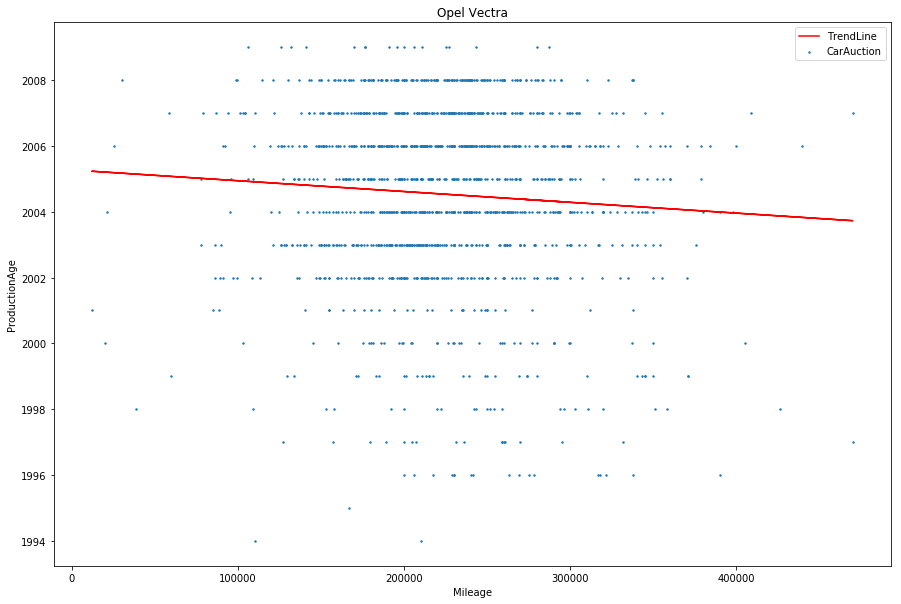

array([[-3.27807577e-06]])

In [171]:
car = data[data.Model == "vectra"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Opel Vectra")

## Golf

In [172]:
car = data[data.Model == "golf"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

    Age  MileageMean  YearMean  Count
34 1983       363000      9811      1
15 1985       178333      5095      6
33 1986        72000      2118      2
35 1987       179000      5424      3
32 1988       168700      5272      3
31 1989       174899      5642      9
29 1990       206791      6893     15
27 1991       230346      7943     26
30 1992       222543      7948      8
14 1993       215990      8000      9
26 1994       228656      8794     11
28 1995       202867      8115     22
24 1996       210763      8782     19
25 1997       205906      8952     27
23 1998       234765     10671    153
13 1999       230305     10967    192
22 2000       229331     11467    218
3  2001       223472     11762    190
7  2002       229048     12725    185
18 2003       221973     13057    195
16 2004       206881     12930    327
12 2005       207309     13821    260
21 2006       206009     14715    213
10 2007       202748     15596    273
5  2008       200241     16687    348
9  2009     

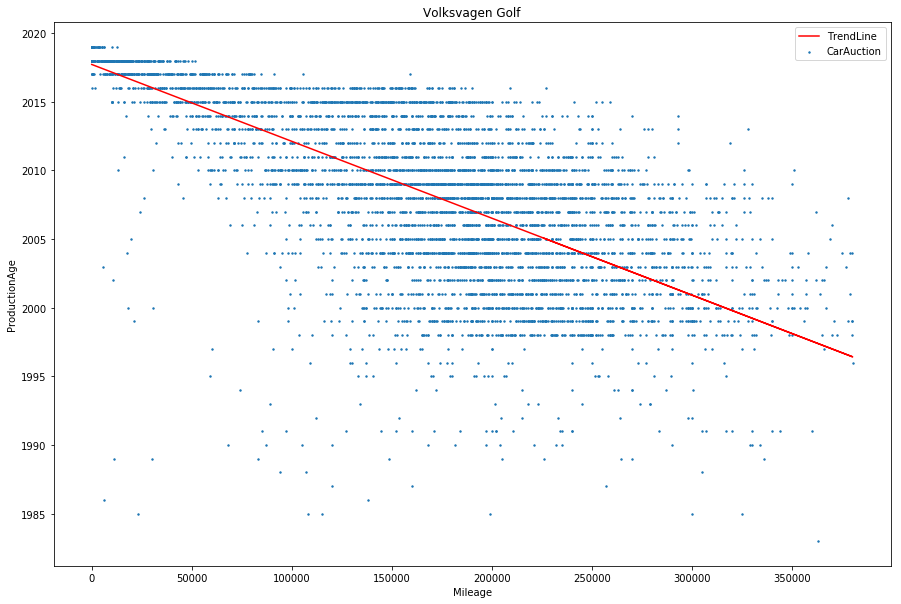

array([[-5.59865467e-05]])

In [173]:
car = data[data.Model == "golf"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Volksvagen Golf")

In [174]:
car = data[data.Model == "passat"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

    Age  MileageMean  YearMean  Count
31 1985        54800      1566      1
32 1986       209462      6161      1
27 1987       227000      6879      2
28 1988       147282      4603      2
25 1990       262760      8759      6
30 1991       241000      8310      3
22 1992       263530      9412      9
33 1993       271444     10054      2
23 1994       273894     10534      9
29 1995       252333     10093      6
24 1996       262284     10928     18
18 1997       271665     11812     50
26 1998       258929     11769     89
19 1999       266555     12693    102
21 2000       260712     13036     87
13 2001       258873     13625    248
20 2002       254791     14155    202
17 2003       253461     14909    218
12 2004       250180     15636    190
4  2005       252395     16826    272
7  2006       244077     17434    382
9  2007       244691     18822    339
11 2008       235106     19592    265
16 2009       221832     20167    175
14 2010       220748     22075    183
3  2011     

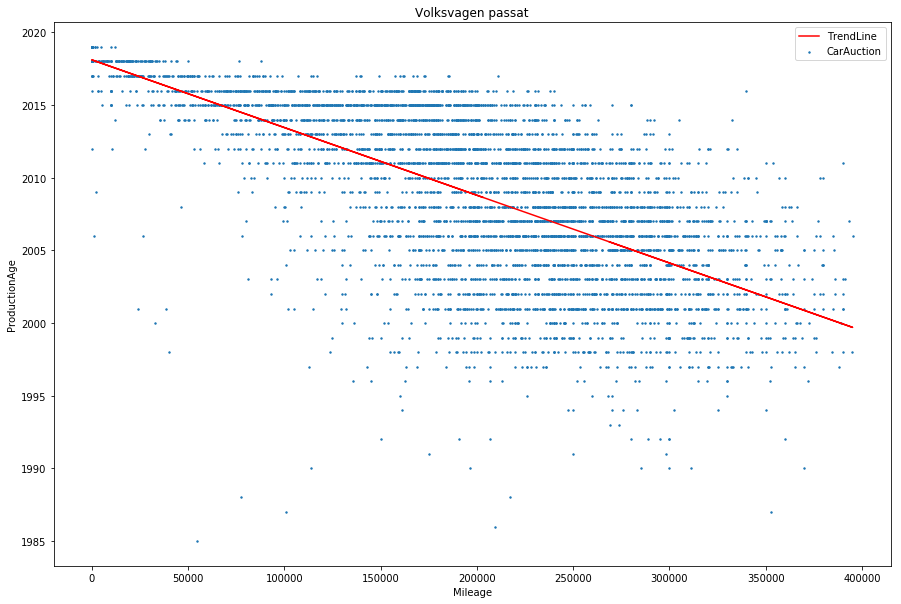

array([[-4.65935514e-05]])

In [175]:
car = data[data.Model == "passat"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Volksvagen passat")